# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [216]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [217]:
# Load data
url= 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [218]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [219]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Berikut informasi dari dataset: \n")
df.info()

Berikut informasi dari dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   flo

**Penjelasan :**
- Dataset terdiri dari 2537 baris
- Features dataset terdiri dari 5 feature numerical (float64) dan 11 feature categorical (object64)
- Terdapat beberapa missing values di setiap baris. Ditandai dengan jumlah values count yang tidak sama dengan jumlah baris dataset

In [220]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**Penjelasan :**

- Feature TransactionAmount memiliki rata-rata(297.65), CustomerAge(44.8), TransactionDuration(119.4), LoginAttempts(1.12), dan AccountBalance(5113.4)
- Nilai minimal dan maximal dari beberapa feature memiliki skala yang jauh satu sama lain.
- Nilai standar deviasi yang jauh dari 1 dan skala antar variabel yang sangat berjauhan.
- Butuh normalisasi dengan StandardScaler (jika masih ingin mentoleransi outliers sbg anomali)

**Penjelasan :**
-

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

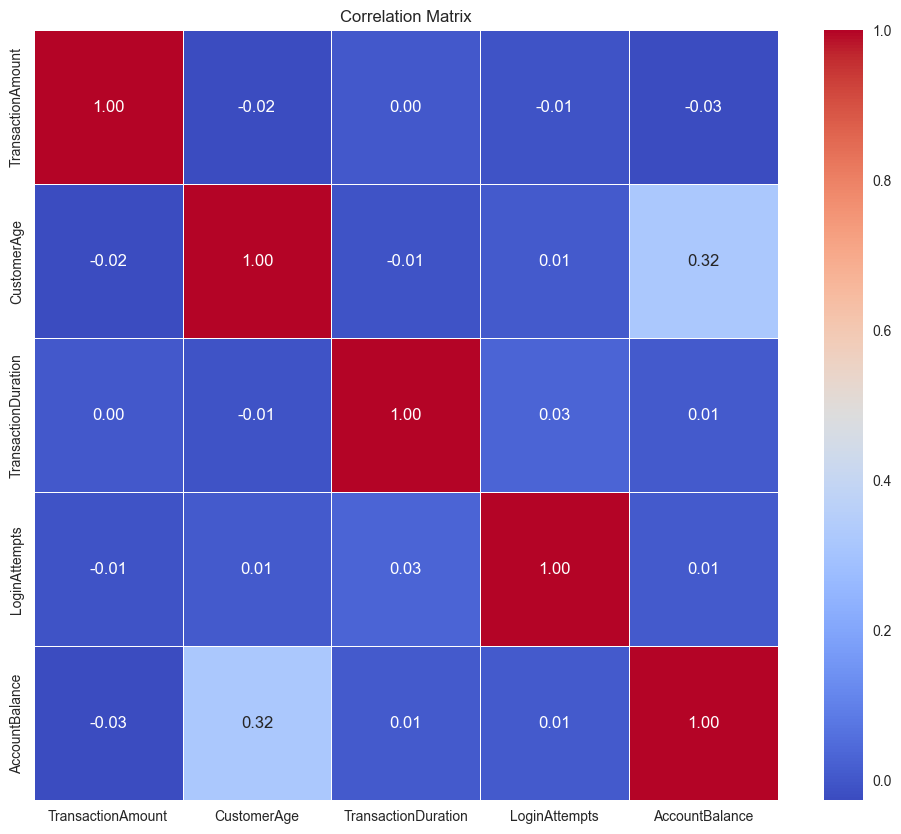

In [221]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_feature = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 10))
correlation_matrix = df[num_feature].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

**Penjelasan :**

Dilihat dari hasil visualisasi matriks korelasi dengan heatmap. Feature-feature numerik tidak memiliki korelasi yang kuat satu sama lain. Namun bisa dilihat bahwa feauture CustomerAge dan AccountBalance memiliki korelasi yang paling tinggi yakni 0.32. Korelasi yang tidak kuat menandakan bahwa tidak ada multikolinearitas antar feature.

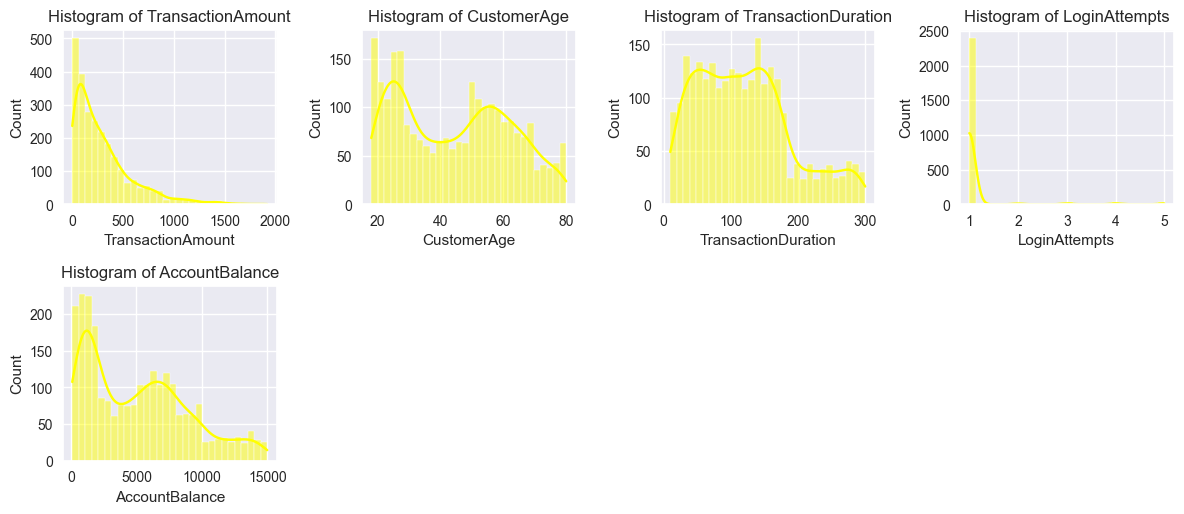

In [222]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

num_vars = df.shape[1]
n_cols = 16

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.select_dtypes(include='number'), 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='yellow')
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

**Penjelasan :**

Hampir semua feature memiliki sebaran data positif skew/right skew. Ekor memanjang ke kanan menunjukkan nilai rata-rata transaksi jauh lebih besar dari pada modus value feature. <br>

1. **`TransactionAmount`**: Banyak orang yang melakukan transaksi dengan nilai kecil. Mengindikasikan ada outlier di sisi kanan.
2. **`CustomerAge`**: Customer yang melakukan transaksi kebanyakan ada pada rentang usia 20 - 30 tahun dan antara 50 - 70 tahun.
3. **`TransactionDuration`**: Most frequently transaksi terjadi antara 20 - 180 detik
4. **`LoginAttempts`**: Modus ada pada satu kali proses login yang langsung berhasil. Namun, ada juga yang gagal login. Bahkan, hingga lima kali. Hal ini bisa mengindikasikan customer yang lupa password atau percobaan pembobolan akun
5. **`AccountBalance`**: Skew kanan, mengindikasikan mean dari saldo akun memiliki balance yang tinggi(banyak orang kaya)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

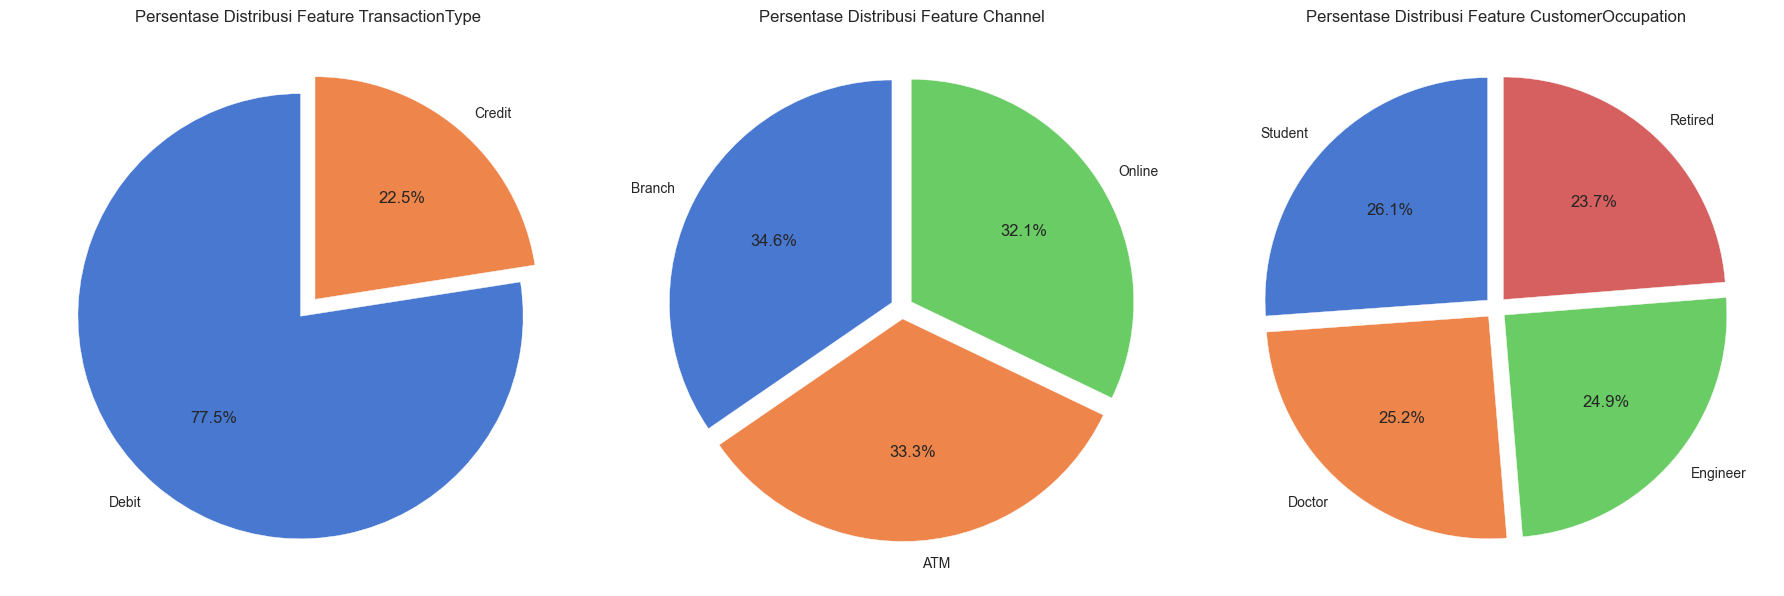

In [223]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

def plot_categorical_feature(columns, data=df, palette='muted'):
    plt.figure(figsize=(18, 6))

    # Plot fitur kategorik untuk divisualisasikan dengan pie chart
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),startangle=90, explode=[0.05]*value_counts.nunique())

        plt.title(f"Persentase Distribusi Feature {column_name}")
        plt.ylabel(' ')
    plt.tight_layout()
    plt.show()

# Gunakan di kolom TransactionType, Channel, dan CustomerOccupation
columns_to_plot = ['TransactionType', 'Channel', 'CustomerOccupation']
plot_categorical_feature(columns_to_plot)

**`Feature TransactionTye:`**
Lebih dari 75% customer menggunakan metode Debit (77.5%) daripada Credit (22.5%). Hal ini menunjukkan banyak orang yang mengalami peningkatan aset daripada peningkatan kas/balance.

**`Feature Channel:`**
Customer paling banyak melakukan transaksi melalui Branch(34.6%), ATM(33.3%), disusul transaksi secara Online(32.1%). Ini artinya banyak customer yang memilih melakukan transaksi melalui bank cabang.

**`Feature CustomerOccupation:`**
Distribusi terbesar customer adalah Siswa(26.1%), Dokter(25.2%), Engineer(24.9%), dan terakhir Pensiunan(23.7%)

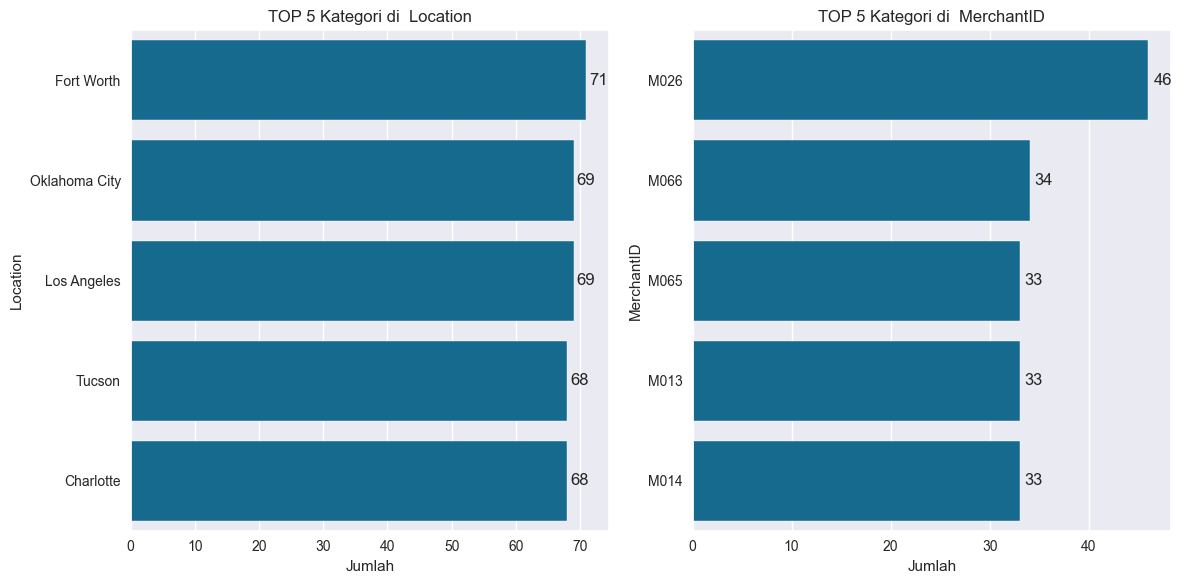

In [224]:
# Visualisasi yang lebih informatif (Opsional Advanced 2)
def top_categories(columns, data=df):
    plt.figure(figsize=(len(columns)*6, 6))

    for x, column_name in enumerate(columns):
        plt.subplot(1, len(columns), x+1)

        # Ambil Top 5 kategori
        top_category = data[column_name].value_counts().nlargest(5)

        # Barplot horizontal
        sns.barplot(
            x=top_category.values,
            y=top_category.index,
        )

        plt.title(f"TOP 5 Kategori di  {column_name}")
        plt.xlabel("Jumlah")
        plt.ylabel(column_name)

        # Tambahin label angka
        for i, v in enumerate(top_category.values):
            plt.text(v + 0.5, i, str(v), va='center')

    plt.tight_layout()
    plt.show()


columns_to_plot = ['Location', 'MerchantID']
top_categories(columns_to_plot)


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [225]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
print("Missing Values Every Feature: \n", missing_values)

Missing Values Every Feature: 
 TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


**Penjelasan :**
Semua fitur memiliki missing values. Namun, jika dilihat dan dibandingkan nilai ini terhitung kecil untuk skala data 2500++ baris

In [226]:
# Mengecek dataset menggunakan duplicated().sum()
duplicat_data = df.duplicated().sum()
print("Total Duplikasi Data: \n", duplicat_data)

Total Duplikasi Data: 
 21


In [227]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()

# Scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Menampilkan lima baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [228]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

In [229]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [230]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categoric_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

label_encoder_dict = {}

# Encoding
for col in categoric_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

    #simpan objek encoder terlatih ke kamus agar dapat diinverse
    label_encoder_dict[col] = label_encoder

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,0,1,2,NaN,3,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


**Penjelasan :**
Setelah melalukan encoding, kita bisa melihat perubahan pada fitur-fitur kategorik: <br>

1. `Fitur TransactionType` : Credit(0), Debit(1)
2. `Fitur Channel` : ATM(0), Branch(1), Online(2)
3. `Fitur CustomerOccupation` : Doctor(0), Engineer(1), Retired(2), Student(3)

In [231]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Keterangan :**

Untuk menangani Missing Values pada kasus ini, memilih menggunakan metode imputasi dengan fillna(). Karena kehilangan 20 - 30 baris data sama dengan kehilangan 20 - 30 informasi. Itu adalah risiko.

In [232]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Missing Values Handling Numerik Feature
median_balance = df.select_dtypes(include='number').median()
df.fillna(median_balance, inplace=True)

# Missing Values Handling Kategorik Feature
modus_balance = df.select_dtypes(include='object').mode().iloc[0]
df.fillna(modus_balance, inplace=True)

# Lihat hasil akhir
missing_values = df.isnull().sum()
print(f"Missing Values now:\n {missing_values}")

Missing Values now:
 TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [233]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()
df.duplicated().sum()

0

**Penjelasan :**
Kolom duplicat sudah dibersihkan

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

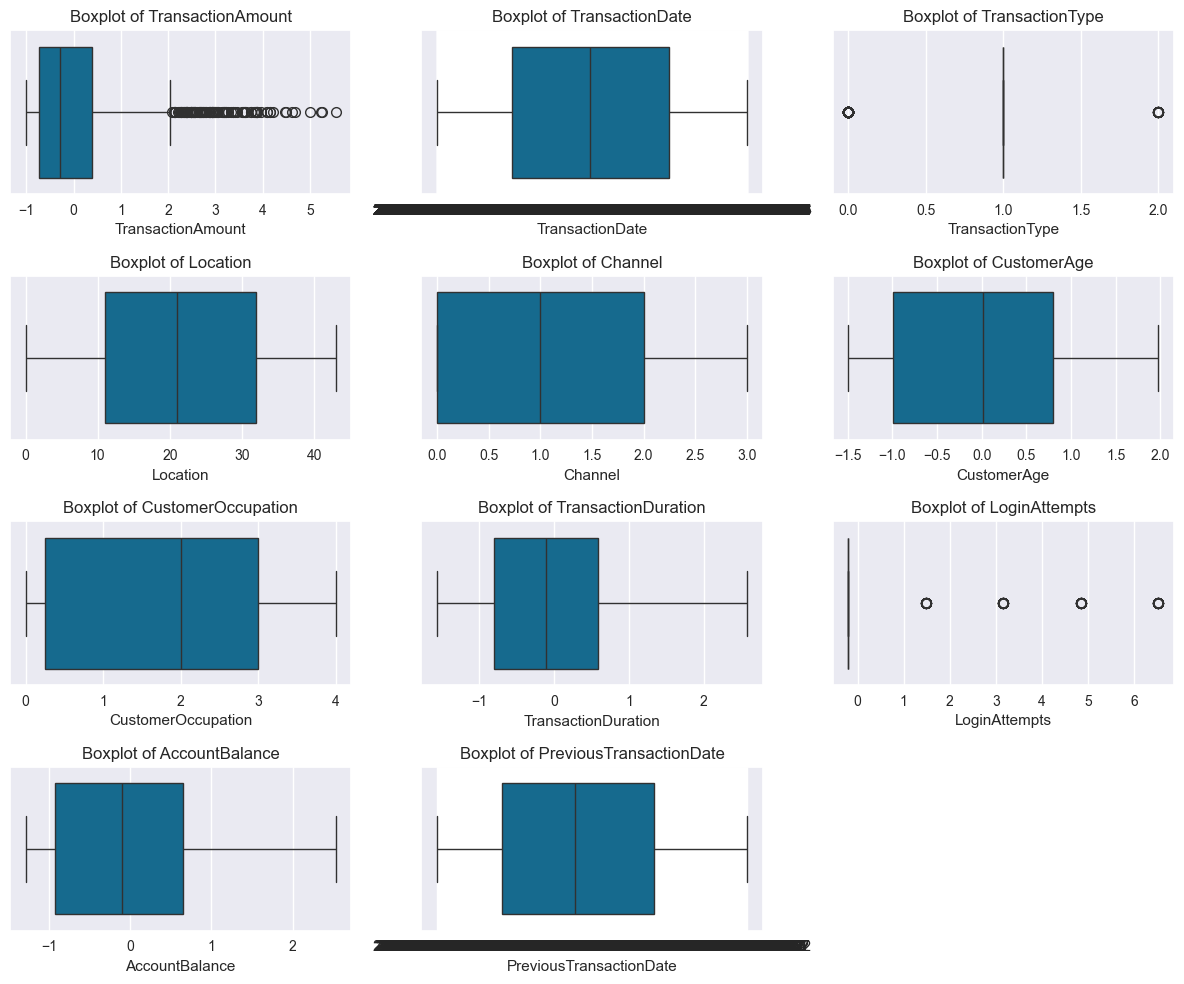

In [234]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

num_vars = df.shape[1]
n_cols = 10

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [235]:
# Melakukan handling outliers dengan metode Capping
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan lower dan upper bound
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(f"\nBatas Bawah: {batas_bawah}")
print(f"Batas Atas: {batas_atas}")

# Melakukan capping menggunakan numpy.clip
df['TransactionAmount'] = df['TransactionAmount'].clip(lower=batas_bawah, upper=batas_atas)


Batas Bawah: -2.409928240589915
Batas Atas: 2.0590120855326877


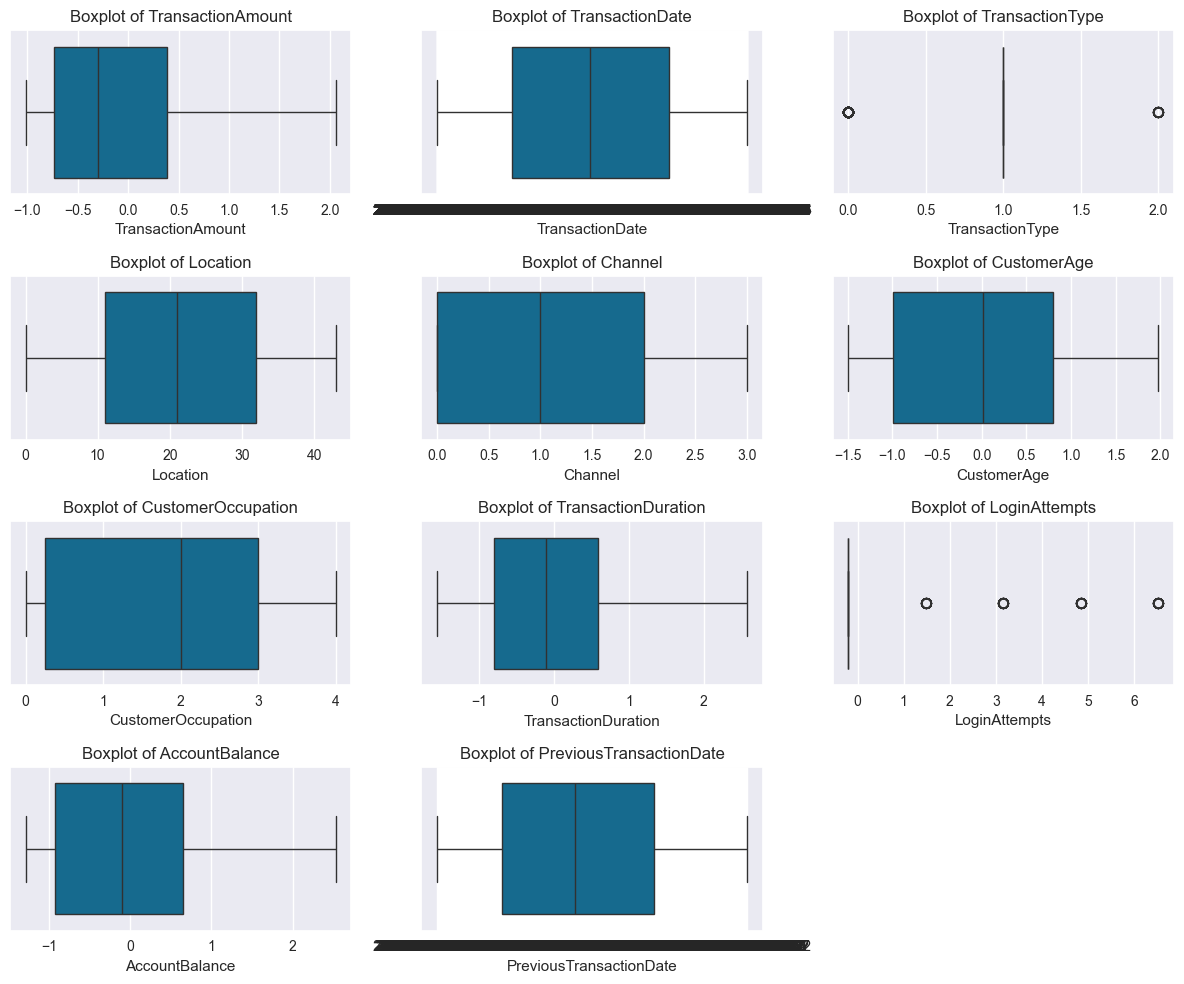

In [236]:
# Visualisasi After Cleaning Outliers
num_vars = df.shape[1]
n_cols = 10

plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

**Penjelasan :**

- Ada satu feature yang memiliki outliers sangat jelas yakni TransactionAmmount. Hal dikarenakan setiap individu memiliki ammount/jumlah transaksi berbeda-beda tergantung keperluan. Jumlah transaksi A bisa menjadi outlier bagi jumlah transaksi B. Namun sebenarnya normal untuk individu A.
- Dengan alasan tersebut, memilih untuk melakukan capping. Yakni mengisi nilai outliers dengan nilai batas bawah atau batas atas. Meskipun Ammount masing-masing customer memang berbeda, tapi kasus ini menggunakan clustering KMeans yang sensitif pada jarak dan skala

In [237]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,-0.048151,0.787987,21.284010,1.01074,-0.003069,1.530231,0.000702,0.000163,-0.000193
std,0.854233,0.437042,12.397534,0.83084,0.994836,1.150477,0.994014,1.000580,0.995102
min,-1.017881,0.000000,0.000000,0.00000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100
25%,-0.734076,1.000000,11.000000,0.00000,-0.991288,0.250000,-0.805299,-0.204629,-0.922221
50%,-0.295362,1.000000,21.000000,1.00000,0.018031,2.000000,-0.105944,-0.204629,-0.097334
75%,0.383159,1.000000,32.000000,2.00000,0.803056,3.000000,0.593411,-0.204629,0.648772
max,2.059012,2.000000,43.000000,3.00000,1.980594,4.000000,2.577295,6.525404,2.531190


In [238]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Melakukan binning dengan metode pandas.cut
bins = [-2, -0.3, 3, np.inf]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['TransactionAmountCategory'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels, right=False)

# Encode
label_encoder = LabelEncoder()
df['TransactionAmountCategory'] = label_encoder.fit_transform(df['TransactionAmountCategory'])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountCategory
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,0
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,0
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,0
4,-0.972736,2023-10-16 17:51:24,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,2024-11-04 08:06:39,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [239]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionAmountCategory
count,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,-0.048151,0.787987,21.284010,1.01074,-0.003069,1.530231,0.000702,0.000163,-0.000193,0.507160
std,0.854233,0.437042,12.397534,0.83084,0.994836,1.150477,0.994014,1.000580,0.995102,0.500048
min,-1.017881,0.000000,0.000000,0.00000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100,0.000000
25%,-0.734076,1.000000,11.000000,0.00000,-0.991288,0.250000,-0.805299,-0.204629,-0.922221,0.000000
50%,-0.295362,1.000000,21.000000,1.00000,0.018031,2.000000,-0.105944,-0.204629,-0.097334,1.000000
75%,0.383159,1.000000,32.000000,2.00000,0.803056,3.000000,0.593411,-0.204629,0.648772,1.000000
max,2.059012,2.000000,43.000000,3.00000,1.980594,4.000000,2.577295,6.525404,2.531190,1.000000


**Penjelasan :**

Sebelum melakukan KElbowVisualizer, perlu melakukan feature selection yang akan digunakan sebagai variabel independent pada clustering. Feature yang dipilih adalah TransactionAmount dan TransactionDuration. Hal ini karena kita bisa mendeteksi hubungan antara kedua fitur.<br>

- Amount yang menengah - besar secara normal tentu membutuhkan waktu transaksi yang tentu tidak sebentar. Terlebih lagi banyak customer melakukan transaksi melalui Branch dan ATM. Dua metode ini tidak akan bisa secepat online transaction.

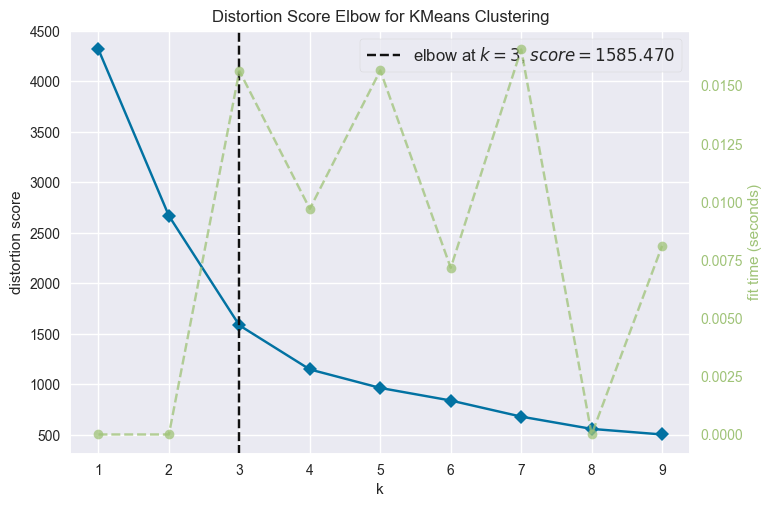

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [242]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Ambil feature yang akan digunakan
X = df[['TransactionAmount', 'TransactionDuration']].values

# INISIALISASI MODEL K-MEANS
kmeans = KMeans()

# INISIALISASI ELBOW
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X)
visualizer.show()

**Penjelasan :**

Dari hasil elbow visualizer, disarankan menggunakan nilai k=3

**Silhouette Score**
Selain KElbow, menggunakan silhouette score juga bisa membantu mengetahui nilai K yang paling optimal untuk clustering

In [243]:
# Inisialisasi list untuk menyimpan skor silhouette
silhouette_scores = []

df_check = df[[ 'TransactionAmount', 'TransactionDuration']]

# Rentang nilai K yang akan diuji
k_range = range(2, 10)

# Jalankan K-means untuk setiap K
for k in k_range:
    # Latih model K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_check)

    # Prediksi klaster
    labels = kmeans.labels_

    # Hitung silhouette score dan simpan
    score = silhouette_score(df_check, labels)
    silhouette_scores.append(score)
    print(f"Untuk K = {k}, Silhouette Score = {score:.4f}")

Untuk K = 2, Silhouette Score = 0.3625
Untuk K = 3, Silhouette Score = 0.4257
Untuk K = 4, Silhouette Score = 0.4146
Untuk K = 5, Silhouette Score = 0.4024
Untuk K = 6, Silhouette Score = 0.4143
Untuk K = 7, Silhouette Score = 0.3934
Untuk K = 8, Silhouette Score = 0.3822
Untuk K = 9, Silhouette Score = 0.3812


Menurut Silhouette Score, jumlah K terbaik untuk model kmeans adalah K=3

In [244]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# AGAR SETIAP CLUSTER PUNYA LABEL
labels = kmeans.labels_

k = 3

# FUNGSI UNTUL ANALISIS KARAKTERISTIK CLSUTER
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_ammount = cluster_data[:, 0].mean()  # Rata-rata Besar Transaksi
        mean_duration = cluster_data[:, 1].mean()  # Rata-rata Waktu Transaksi

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Mean Transaction Amount: {mean_ammount:.2f}")
        print(f"Mean Transaction Duration : {mean_duration:.2f}")

# ANALISIS KARAKTERISTIK SETIAP CLUSTER
analyze_clusters(X, labels, k)

# Menambahkan label untuk hasil clustering
df['Cluster'] = labels

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Mean Transaction Amount: 1.34
Mean Transaction Duration : -0.09

Cluster 2:
Mean Transaction Amount: -0.43
Mean Transaction Duration : -0.71

Cluster 3:
Mean Transaction Amount: -0.38
Mean Transaction Duration : 1.02


Jalankan cell code ini untuk menyimpan model kamu.

In [245]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountCategory,Cluster
0,-0.970546,2023-04-11 16:29:14,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08,0,1
1,0.268963,2023-06-27 16:44:19,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,2024-11-04 08:09:35,1,2
2,-0.586526,2023-07-10 18:16:08,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04,0,1
3,-0.387294,2023-05-05 16:32:11,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06,0,1
4,-0.972736,2023-10-16 17:51:24,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,2024-11-04 08:06:39,0,2


In [246]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [247]:
# Menghitung dan menampilkan nilai Silhouette Score.
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

silhouette_score = silhouette_score(X, labels)
print(f"Silhouette score: {silhouette_score}")

Silhouette score: 0.4254055757132861


**Penjelasan :**
Nilai silhouette score ada;ah 0.425 <br>

Ini merupakan nilai yang normal dan model dapat mengklusterisasi data dengan baik. Namun, belum maksimal dan masih ada beberapa data yang tumpang tindih

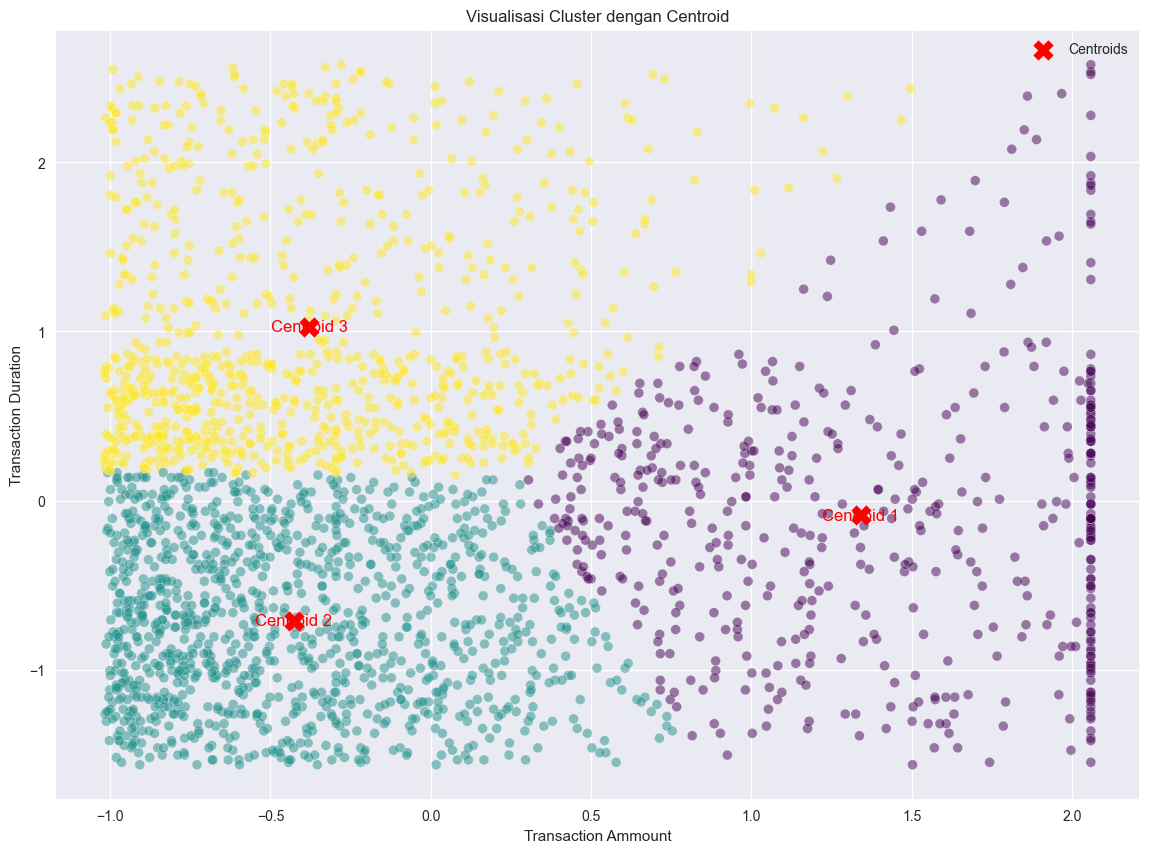

Nilai Centroids:
Centroid 1: TransactionAmount = 1.34, TransactionDuration = -0.09
Centroid 2: TransactionAmount = -0.43, TransactionDuration = -0.71
Centroid 3: TransactionAmount = -0.38, TransactionDuration = 1.03


In [248]:
# Membuat visualisasi hasil clustering
''' TENTUKAN PCC CENTROID '''
centroids = kmeans.cluster_centers_

''' VISUALISASI CLUSTER '''
plt.figure(figsize=(14, 10))

''' PLOT DATA '''
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5, edgecolor='w', marker='o')

''' PLOT CENTROID '''
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

''' MENAMBAHKAN LABEL '''
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

''' MENAMBAHKAN JUDUL DAN LABEL '''
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Transaction Ammount')
plt.ylabel('Transaction Duration')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: TransactionAmount = {centroid[0]:.2f}, TransactionDuration = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [249]:
# Membangun model menggunakan PCA.
numeric_features = df.select_dtypes(include='number').columns
pca =PCA(n_components= 2)
pca_df = pca.fit_transform(df[numeric_features])

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
pca_df_final = pd.DataFrame(pca_df, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters= 3)
kmeans_pca.fit(pca_df_final)

KMeans(n_clusters=3)

In [250]:
# Lihat feature hasil PCA
pca_df_final.head()

,PCA1,PCA2
0,14.713344,-1.709262
1,-6.289213,-2.874907
2,1.721209,2.201865
3,11.719578,0.955256
4,-20.285700,0.665883


In [251]:
# Evaluasi model dengan PCA
# import ulang silhouette score agar tidak terjadi penumpukkan dengan silhouette score sebelumnya
from sklearn.metrics import silhouette_score

X_PCA = pca_df_final[['PCA1', 'PCA2']].values
kmeans_PCA = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels_PCA = kmeans_PCA.fit_predict(X_PCA)

sil_score_PCA = silhouette_score(X_PCA, labels_PCA)
print(f"Silhouette Score with PCA: {sil_score_PCA}")

Silhouette Score with PCA: 0.5475937868198015


**Penjelasan :**

Ternyata hasil dari Penggunaan PCA memiliki silhouette score yang lebih tinggi (0.55). Hal ini dikarenakan PCA mengurangi dimensionalitas data, sehingga model dapat mengkluster dengan lebih jelas dan mereduksi tumpang tindih data.

In [252]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_PCA, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [253]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
analysis_result = df.groupby('Cluster')[numeric_features].agg(['mean', 'min', 'max'])
print(analysis_result)

        TransactionAmount                     TransactionType          \
                     mean       min       max            mean min max   
Cluster                                                                 
0                1.341734  0.304695  2.059012        0.755814   0   2   
1               -0.425903 -1.015896  0.753061        0.792174   0   2   
2               -0.381600 -1.017881  1.496390        0.801887   0   2   

          Location           Channel  ... LoginAttempts AccountBalance  \
              mean min max      mean  ...           max           mean   
Cluster                               ...                                
0        21.393411   0  43  0.988372  ...      6.525404      -0.005844   
1        21.340870   0  43  1.026087  ...      6.525404      -0.009903   
2        21.140330   0  43  1.003538  ...      6.525404       0.016414   

                            TransactionAmountCategory         Cluster          
              min       max         

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Jumlah Transaksi Besar & Waktu Normal):** <br>
    - **Rata-rata (mean) Transaction Amount:** 1.34
    - **Rata-rata (mean) Transaction Duration:** -0.09
    - **Analisis:** Cluster ini mencakup nasabah yang melakukan transaksi dengan jumlah yang besar. Kemungkinan adalah pola bagi pelanggan premium atau korporat. Meskipun begitu, waktu untuk bertransaksi masih terhitung normal. **Resiko Fraud dari Klaster ini adalah Moderat** <br><br>

2. **Cluster 2: (Jumlah Transaksi Kecil & Waktu Singkat):** <br>
    - **Rata-rata (mean) Transaction Amount:** -0.43
    - **Rata-rata (mean) Transaction Duration:** -0.71
    - **Analisis:** Cluster ini mencakup pelanggan yang melakukan transaksi rutin kecil-kecilan. Bisa saja pelajar, melakukan belanja online, dan nasabah kelas menengah kebawah. Durasi transaksi yang singkat (1 menit) terhitung normal untuk jumlah yang sedikit. Namun, juga perlu perhatian karena pelaku bisa saja melakukan micro-transaction dengan otomatisasi. **Resiko Fraud dari Klaster ini Signifikan.** Rekomendasi perlakuan adalah menganalisis lebih jauh untuk transaksi kecil dengan waktu cepat, lokasi transaksi, dan merchant<br><br>

3. **Cluster 3: (Jumlah Transaksi Kecil & Waktu Lama):** <br>
    - **Rata-rata (mean) Transaction Amount:** -0.38
    - **Rata-rata (mean) Transaction Duration:** 1.02
    - **Analisis:** Cluster ini mencakup nasabah yang melakukan transaksi dengan jumlah yang kecil namun sedikit di atas jumlah claster kedua. Waktu transaksi yang lama dapat mengindikasikan masalah teknis, internet, keraguan jumlah transaksi atau justru upaya manipulasi dengan siber. **Resiko Fraud dari Klaster ini adalah Signifikan.** Rekomendasi perlakuan adalah analisis lebih mendalam pada transaksi kecil tapi memiliki durasi lama, analisis lokasi, chanel, dan berapa kali jumlah login yang dilakukan

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [254]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

In [255]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [256]:
# inverse dataset ke rentang normal untuk numerikal
df[numeric_cols] = scaler.inverse_transform(df[numeric_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountCategory,Target
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,0,1
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,0,1
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,0,1
4,13.45,2023-10-16 17:51:24,0,1,2,45.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,0,2


In [257]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in categoric_cols:
    le = label_encoder_dict[col]
    df[col] = le.inverse_transform(df[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountCategory,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0,2


In [258]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Untuk numerik
numeric_features_inversed = df.select_dtypes(include='number').columns
analysis_result_num = df.groupby('Target')[numeric_features_inversed].agg(['mean', 'min', 'max'])
print(analysis_result_num)

# Untuk kategorik
categoric_features_inversed = df.select_dtypes(include='object').columns
analysis_result_cat = df.groupby('Target')[categoric_features_inversed].agg(pd.Series.mode)
print(analysis_result_cat)

       TransactionAmount                   CustomerAge              \
                    mean     min       max        mean   min   max   
Target                                                               
0             689.673861  386.68  899.2425   43.839147  18.0  80.0   
1             173.219391    0.84  517.6800   45.341739  18.0  80.0   
2             186.163632    0.26  734.8600   44.127358  18.0  80.0   

       TransactionDuration               LoginAttempts  ...       \
                      mean    min    max          mean  ...  max   
Target                                                  ...        
0               113.294574   10.0  300.0      1.100775  ...  5.0   
1                69.442609   10.0  131.0      1.120870  ...  5.0   
2               191.077830  130.0  300.0      1.135613  ...  5.0   

       AccountBalance                   TransactionAmountCategory          \
                 mean     min       max                      mean min max   
Target          

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Jumlah Transaksi Besar & Waktu Normal):** <br>
    - **Rata-rata (mean) Transaction Amount:** 689.24
    - **Rata-rata (mean) Transaction Duration:** 113.11 detik
    - **Analisis:** Cluster ini mencakup nasabah yang melakukan transaksi dengan jumlah yang besar. Kemungkinan adalah pola bagi pelanggan premium atau korporat. Meskipun begitu, waktu untuk bertransaksi masih terhitung normal. **Resiko Fraud dari Klaster ini adalah Moderat** <br><br>

2. **Cluster 2: (Jumlah Transaksi Kecil & Waktu Singkat):** <br>
    - **Rata-rata (mean) Transaction Amount:** 171.99
    - **Rata-rata (mean) Transaction Duration:** 69.67 detik
    - **Analisis:** Cluster ini mencakup pelanggan yang melakukan transaksi rutin kecil-kecilan. Bisa saja pelajar, melakukan belanja online, dan nasabah kelas menengah kebawah. Durasi transaksi yang singkat (1 menit) terhitung normal untuk jumlah yang sedikit. Namun, juga perlu perhatian karena pelaku bisa saja melakukan micro-transaction dengan otomatisasi. **Resiko Fraud dari Klaster ini Signifikan.** Rekomendasi perlakuan adalah menganalisis lebih jauh untuk transaksi kecil dengan waktu cepat, lokasi transaksi, dan merchant<br><br>

3. **Cluster 3: (Jumlah Transaksi Kecil & Waktu Lama):** <br>
    - **Rata-rata (mean) Transaction Amount:** 186.60
    - **Rata-rata (mean) Transaction Duration:** 190.89 detik
    - **Analisis:** Cluster ini mencakup nasabah yang melakukan transaksi dengan jumlah yang kecil namun sedikit di atas jumlah claster kedua. Waktu transaksi yang lama dapat mengindikasikan masalah teknis, internet, keraguan jumlah transaksi atau justru upaya manipulasi dengan siber. **Resiko Fraud dari Klaster ini adalah Signifikan.** Rekomendasi perlakuan adalah analisis lebih mendalam pada transaksi kecil tapi memiliki durasi lama, analisis lokasi, chanel, dan berapa kali jumlah login yang dilakukan

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [259]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

# Data sudah diintegrasikan
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmountCategory,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0,2


In [260]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.